<a href="https://colab.research.google.com/github/veeranjaneyaM/Cognifyz-Technologies-Machine-Learning-Internship/blob/main/cognifyz_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 2: Load Dataset
df = pd.read_csv('restraunt.csv')  # Use your file path

In [6]:
# Step 3: Drop Irrelevant Columns
# These columns are IDs or text-heavy and won't help with prediction
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address',
                   'Locality', 'Locality Verbose', 'Rating color',
                   'Rating text', 'Switch to order menu']
df_cleaned = df.drop(columns=columns_to_drop)

In [7]:
# Step 4: Handle Missing Values
# Only 'Cuisines' has missing values; fill them with 'Unknown'
df_cleaned['Cuisines'].fillna('Unknown', inplace=True)

<ipython-input-7-13dfb80e6a38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Cuisines'].fillna('Unknown', inplace=True)


In [8]:
# Step 5: Encode Categorical Variables
# Use Label Encoding for simplicity (for tree-based models like Random Forest)
label_enc = LabelEncoder()
categorical_cols = df_cleaned.select_dtypes(include='object').columns

for col in categorical_cols:
    df_cleaned[col] = label_enc.fit_transform(df_cleaned[col])


In [9]:
# Step 6: Split Features and Target
# 'Aggregate rating' is the target to predict
X = df_cleaned.drop('Aggregate rating', axis=1)
y = df_cleaned['Aggregate rating']

In [10]:
# Step 7: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 8: Train a Regression Model
# We'll use Random Forest Regressor for better accuracy
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error (MSE): 0.088
R² Score: 0.961


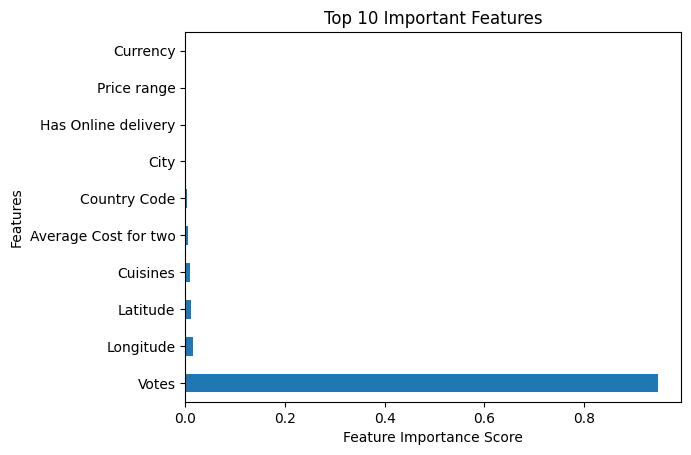

In [13]:
# Identify most important features
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()